In [1]:
import pandas as pd
import numpy as np
import hmm
import helper_functions as hf
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm_notebook as tqdm
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cow_1 = pd.read_json('data/cowrie_1.json', lines=True)
cow_3 = pd.read_json('data/cowrie_3.json', lines=True)
cow_4 = pd.read_json('data/cowrie_4.json', lines=True)

In [3]:
# k,le = hf.process_data(cow_1,cow_3,cow_4)

Data Shape : (1058090, 30)


,compCS,data,dst_ip,dst_port,duration,encCS,eventid,height,input,isError,...,size,src_ip,src_port,system,timestamp,ttylog,url,username,version,width
0,NaN,NaN,10.10.0.13,2222.0,NaN,NaN,cowrie.session.connect,NaN,NaN,0.0,...,NaN,116.31.116.16,39547.0,cowrie.ssh.factory.CowrieSSHFactory,2017-07-03 18:30:07.569246,NaN,NaN,NaN,NaN,NaN
1,[none],NaN,NaN,NaN,NaN,"[aes128-ctr, aes192-ctr, aes256-ctr, aes256-cb...",cowrie.client.version,NaN,NaN,0.0,...,NaN,116.31.116.16,NaN,"HoneyPotSSHTransport,523,116.31.116.16",2017-07-03 18:30:08.235671,NaN,NaN,NaN,SSH-2.0-PUTTY,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,cowrie.login.success,NaN,NaN,0.0,...,NaN,116.31.116.16,NaN,SSHService 'ssh-userauth' on HoneyPotSSHTransp...,2017-07-03 18:30:10.585142,NaN,NaN,root,NaN,NaN
3,NaN,NaN,NaN,NaN,9.96463,NaN,cowrie.session.closed,NaN,NaN,0.0,...,NaN,116.31.116.16,NaN,"HoneyPotSSHTransport,523,116.31.116.16",2017-07-03 18:30:17.902600,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,10.10.0.13,2222.0,NaN,NaN,cowrie.session.connect,NaN,NaN,0.0,...,NaN,116.31.116.16,22040.0,cowrie.ssh.factory.CowrieSSHFactory,2017-07-03 18:30:44.657703,NaN,NaN,NaN,NaN,NaN


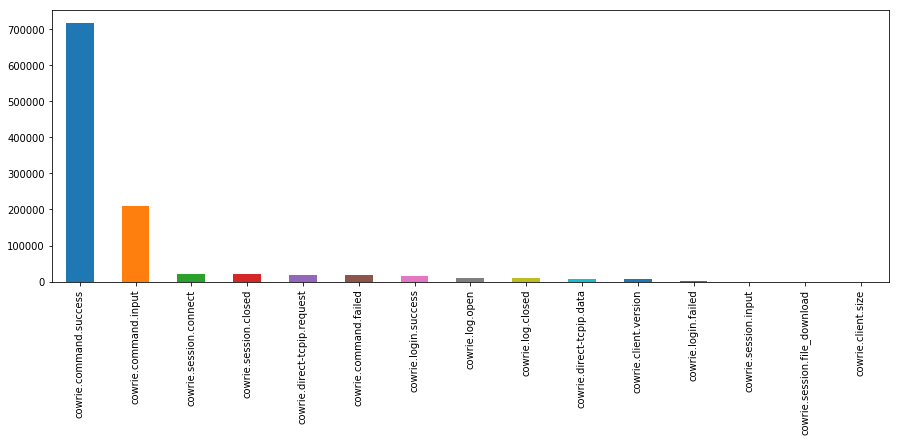

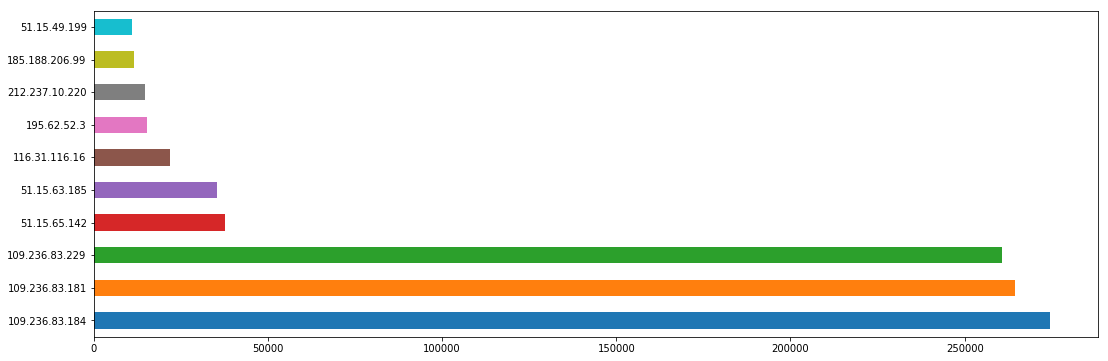

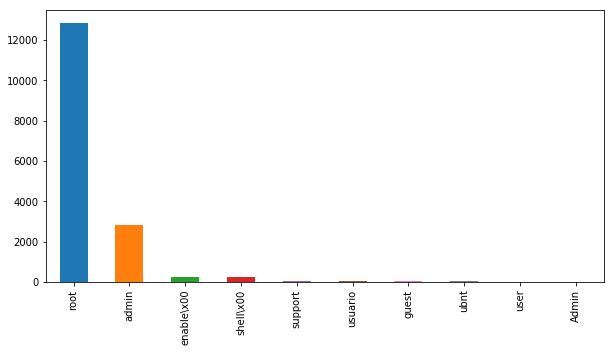

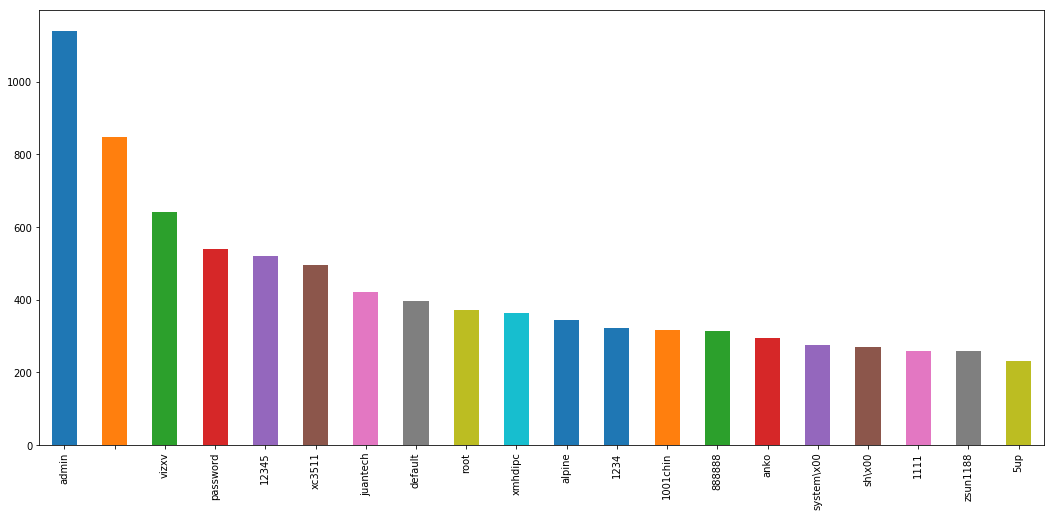

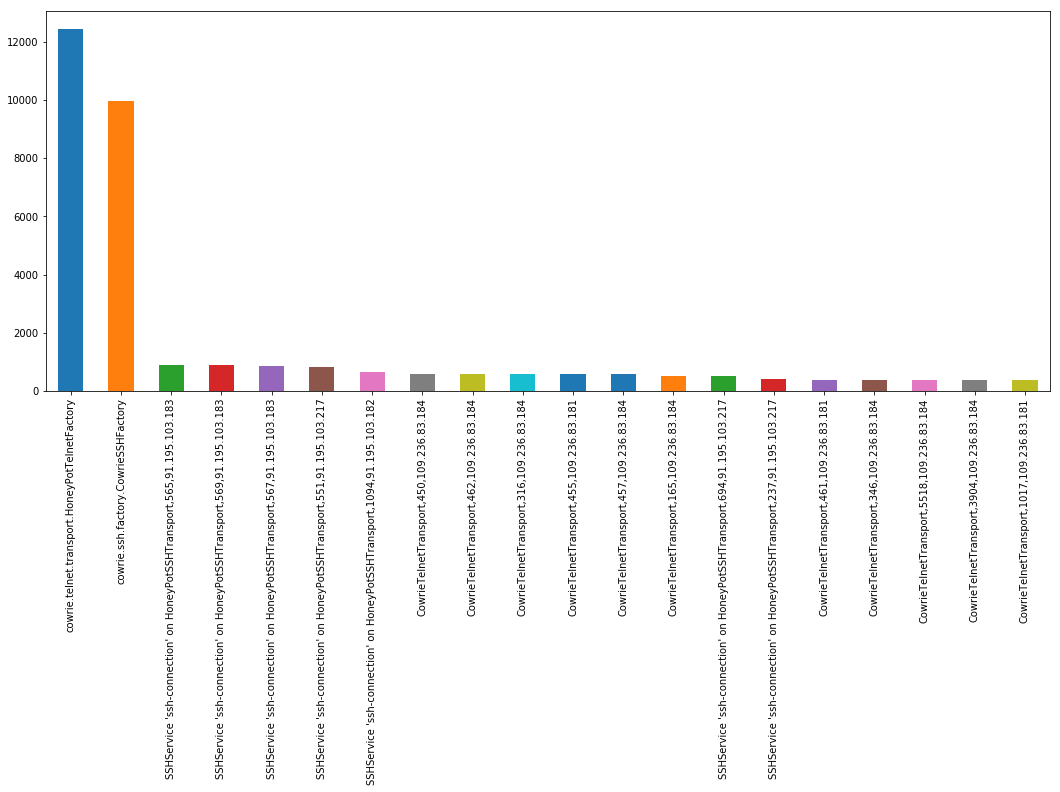

In [4]:
hf.vis(cow_1,cow_3,cow_4)

In [5]:
# If direct seq_events available
k = hf.load_pickle('seq_events.txt')

pickle loading complete


In [6]:
hf.sample_per_seq(k, 3000)

HBox(children=(IntProgress(value=0, max=3000), HTML(value='')))


Top maximum number of sequence length: 

    length  no of samples
0      2.0         5237.0
1      4.0         4959.0
2    199.0         3032.0
3      5.0         1903.0
4      3.0         1481.0
5     71.0          659.0
6     31.0          637.0
7    129.0          625.0
8      6.0          549.0
9     23.0          482.0
10   194.0          443.0
11   197.0          418.0
12    15.0          326.0
13    19.0          306.0
14    69.0          188.0
15    26.0          119.0
16     7.0          114.0
17    16.0          112.0
18    11.0           65.0
19    13.0           65.0


In [7]:
length = 7

In [8]:
data = hf.desired_seq(k,length)

HBox(children=(IntProgress(value=0, max=22449), HTML(value='')))


total samples found: 114

few samples of data of sequence length 7
[[12  1 10  6  6  5 11]
 [12  1 10  0  8  7 11]
 [12  1 10  6  6  5 11]
 [12  1 10  0  8  7 11]
 [12  1 10  0  8  7 11]]


In [9]:
N = 17
M = 17
T = length

In [10]:
mod = hmm.HMM(N, M, T)

In [11]:
print (mod.train(data))

Update #1 Log Probability: -0.31030148557609505 -- Mean Error 0.000894807141101481
Update #1 Probability: 3.644513529972599e-05
Update #2 Log Probability: -0.06499218823539152 -- Mean Error 0.0012045512124440436
Update #2 Probability: 0.0005316370481021173
Update #3 Log Probability: -0.036941190798030356 -- Mean Error 0.0005166689254907546
Update #3 Probability: 0.002155979265673223
Update #4 Log Probability: -0.03104357978353162 -- Mean Error 0.00017727104650647906
Update #4 Probability: 0.0029959376014566225
Update #5 Log Probability: -0.02598231647145385 -- Mean Error 0.00016428841343070347
Update #5 Probability: 0.004003746861329511
Update #6 Log Probability: -0.018281508311543383 -- Mean Error 0.0002240628730329261
Update #6 Probability: 0.006251132663743252
Update #7 Log Probability: -0.006228449382913009 -- Mean Error 0.00044737087069140623
Update #7 Probability: 0.012475853574679018
Update #8 Log Probability: -0.0009246125013780464 -- Mean Error 0.0003983554020212004
Update #8 

In [12]:
result = hf.calculate_probablity(mod,data)

HBox(children=(IntProgress(value=0, max=114), HTML(value='')))


result samples: 

                        seq  prob
0  [12, 1, 10, 6, 6, 5, 11]   0.0
1  [12, 1, 10, 0, 8, 7, 11]   0.0
2  [12, 1, 10, 6, 6, 5, 11]   0.0
3  [12, 1, 10, 0, 8, 7, 11]   0.0
4  [12, 1, 10, 0, 8, 7, 11]   0.0

 Further analysis of results:  

             prob
count  114.000000
mean     0.017064
std      0.128263
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      0.972676

 Max probablity sequence: 

seq     [12, 1, 10, 6, 6, 6, 11]
prob                    0.972676
Name: 8, dtype: object
